# K means Algorithm

- K means clustring is an unsupervised learning algorithm which gruops the unlabeled dataset,into different clusters.
- k defines the number of pre defined clusters that need to be created in the process as if k=2 there will be 2 clusters ,if k=3 there will 3 clusters

# using K means Clustering to cluster universities into 2 grups:private and public
# The Data 
 - Data frame has 777 observations on the follwing 18 variables 
    - private a factor with levels No and yes including Private or  Public university
    - Apps number of applications received\
    - accept number of applications accepted
    - Enroll number of new students enrolled
    -  Top 10perc new students from top 10 of hs classs
    - Top 25 percent new students from top 25% of hs class
    - f.undergrand number of fulltime undergraduates
    - P.undergrad number of parttime undergraduates
    - Outstate out of state tution 
    - room-board room and board costs
    - books estimated book costs
    - personal estimated personal spending
    - phd act of faculty with ph.d's
    - terminal act of faculty with terminal degree
    - perc.alumini pct -alumni who donate
    - Expend instructional expenditure per students
    - grad.rate -graduation rate


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [21]:
df =pd.read_csv('College_Data',index_col=0)

In [22]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

# EDA
- Creating a scatterplot of Grad.Rate v/s Room.Board where tthe points are colored by private columns

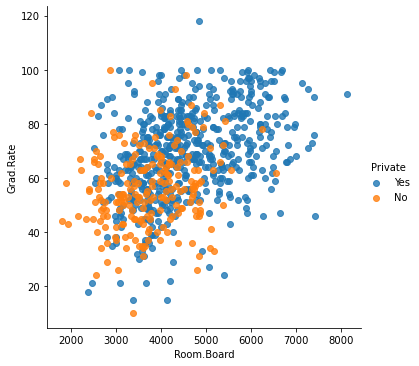

In [24]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data =df,hue ='Private',fit_reg=False)

# Creating a scatterplot of F.undergrad v/s Outstate where the points are colored by private column

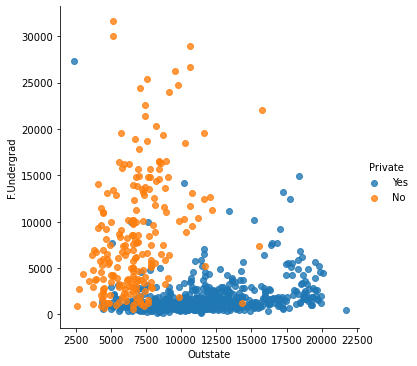

In [25]:
sns.lmplot(x='Outstate',y='F.Undergrad',data =df,hue ='Private',fit_reg=False)

C:\Users\Administrator\anaconda3\vhc\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


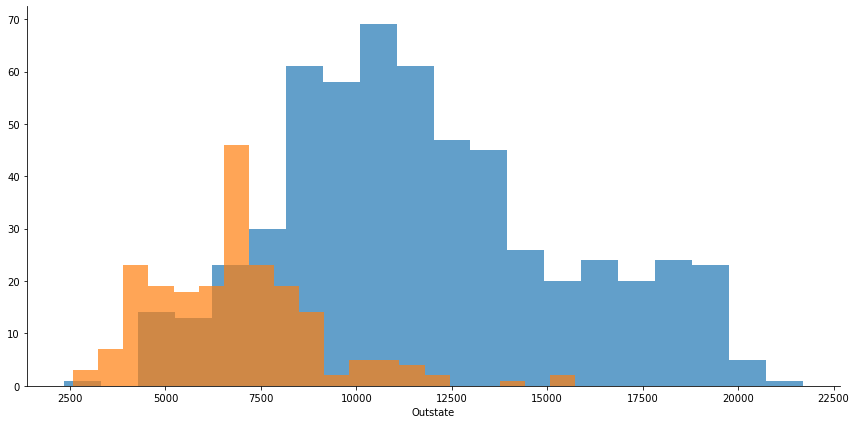

In [26]:
g=sns.FacetGrid(df,hue='Private',size=6,aspect=2)
g=g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

C:\Users\Administrator\anaconda3\vhc\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


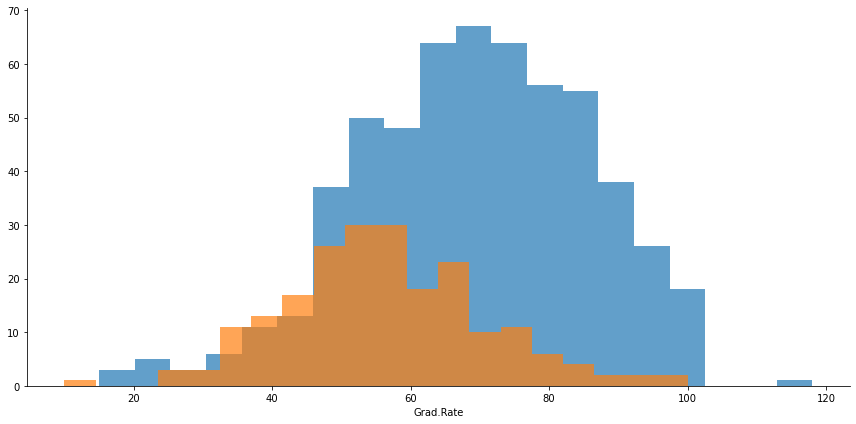

In [27]:
g=sns.FacetGrid(df,hue='Private',size=6,aspect=2)
g=g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [28]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [30]:
df['Grad.Rate']['Cazenovia College']=100

<ipython-input-30-419a0d91f27a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College']=100


C:\Users\Administrator\anaconda3\vhc\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


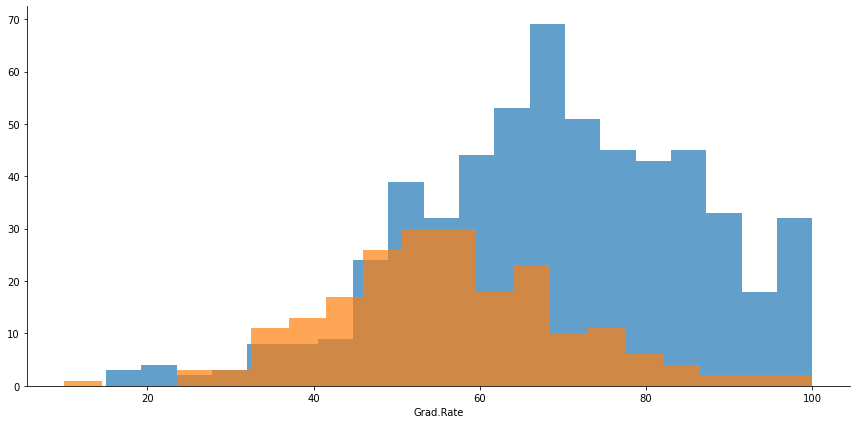

In [31]:
g=sns.FacetGrid(df,hue='Private',size=6,aspect=2)
g=g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

# k means Cluster Creation

In [32]:
from sklearn.cluster import KMeans

- create an instance of a k means model with 2 clusters

In [33]:
kmeans =KMeans(n_clusters=2)

- Fitting the model to all the data except for the private Label

In [35]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [37]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

# Evaluation

- Creating a new column for df caleed 'Cluster' which is a 1 for Private school and 0 for a public school

In [40]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [41]:
df['Cluster']=df['Private'].apply(converter)

In [42]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


# Creating a confusion matrix and classification report to see how well the k means clustering worked with being given any lables

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

